<a href="https://colab.research.google.com/github/Fabriciogg8/MetodosCuantitativos/blob/main/MetodosCuantitativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio 1

Se quiere estimar el rendimiento medio y la probabilidad de infección de roya en trigo. Se sembraron 9 parcelas de 20m2 donde se observaron 20 plantas de cada parcela-

| Parcela | Rendimiento (t/ha) | Nº Plantas Infectadas |
|---------|---------------------|------------------------|
| 1       | 1.4                 | 3                      |
| 2       | 1.9                 | 4                      |
| 3       | 2.3                 | 2                      |
| 4       | 1.6                 | 6                      |
| 5       | 2.1                 | 4                      |
| 6       | 2.0                 | 8                      |
| 7       | 1.8                 | 1                      |
| 8       | 1.9                 | 3                      |
| 9       | 2.4                 | 5                      |


* 1- Escriba las variables aleatorias que se tomaron en consideración
* 2- Que tipo de distribución teórica se da en cada variable aleatoria
* 3- Construya un intervalo de confianza del 95% para la verdadera media del rendimiento del trigo
* 4- Construya lo mismo pero para la varianza poblacional del rendimiento del trigo
* 5- Construya un cuadro con 95% de confianza oara la verdadera proporción de infección de roya en tallo

In [36]:
# Importamos las librerias necesarias
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import math


### **Pregunta1**

- \( X_i \): Rendimiento del trigo (t/ha) en la parcela \( i \)  
- \( Y_i \): Número de plantas infectadas por roya en la parcela \( i \)


### **Pregunta 2**

Variables Aleatorias y Distribuciones:

1. Rendimiento por parcela (t/ha):
   - Tipo: Continua
   - Distribución teórica: Normal (aproximada)
   - Justificación:
     * Variable continua con posibles valores decimales
     * Múltiples factores independientes afectan el rendimiento (TLC)

2. Número de plantas infectadas por parcela:
   - Tipo: Discreta
   - Distribución teórica: Binomial(n=20, p=prob_infección)
   - Justificación:
     * Conteo de éxitos (infección) en tamaño fijo (20 plantas)
     * Alternativa: Poisson si probabilidad es baja (λ=np)

### **Pregunta 3**

In [3]:
df = pd.DataFrame({
    "rendimiento": [1.4,1.9,2.3,1.6,2.1,2.0,1.8,1.9,2.4],
    "plantas_infectadas": [3,4,2,6,4,8,1,3,5]
}, index=[1,2,3,4,5,6,7,8,9])

df

,rendimiento,plantas_infectadas
1,1.4,3
2,1.9,4
3,2.3,2
4,1.6,6
5,2.1,4
6,2.0,8
7,1.8,1
8,1.9,3
9,2.4,5


In [4]:
n = len(df)
media = df["rendimiento"].mean()
varianza = df["rendimiento"].var()
std = df["rendimiento"].std()

print(f"Tamaño de la muestra: {n}")
print(f"Media: {round(media,2)}")
print(f"Varianza: {round(varianza, 2)}")
print(f"Desviación estándar: {round(std,2)}")

Tamaño de la muestra: 9
Media: 1.93
Varianza: 0.1
Desviación estándar: 0.32


In [21]:
# 2. Valor crítico t (99% de confianza)
grados_libertad = n - 1
nivel_confianza = 0.95
alfa = 1 - nivel_confianza
valor_critico_t = stats.t.ppf(1 - alfa / 2, grados_libertad)

# 3. Error estándar y margen de error
error_estandar = std / n**0.5
margen_error = valor_critico_t * error_estandar

# 4. Intervalo de confianza
limite_inferior = media - margen_error
limite_superior = media + margen_error

print(f"\nValor crítico t ({nivel_confianza*100}%): {valor_critico_t:.2f}")
print(f"Error estándar: {error_estandar:.2f}")
print(f"Margen de error: {margen_error:.2f}")
print(f"\nIntervalo de confianza al {nivel_confianza*100}%:")
print(f"[ {limite_inferior:.2f} , {limite_superior:.2f} ] t/ha")



Valor crítico t (95.0%): 2.31
Error estándar: 0.11
Margen de error: 0.24

Intervalo de confianza al 95.0%:
[ 1.69 , 2.18 ] t/ha


Vamos a gráficar la campana para poder tener una representación visual
- np.linspace(inicio, fin, cantidad) genera 1000 valores equidistantes

- Se toma un rango de ± 4 veces el error estándar porque, en una distribución normal, aproximadamente 99.99% de los valores caen dentro de ese intervalo
- Por lo tanto, estamos creando el eje X que representa los posibles valores de rendimiento.



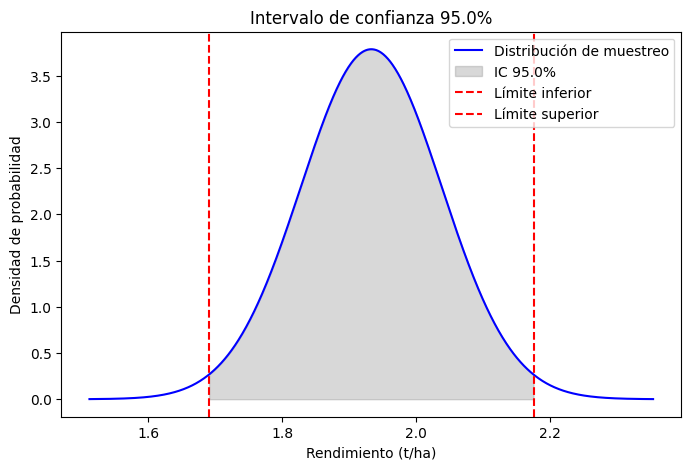

In [7]:
# Valores para la campana de distribución
x = np.linspace(media - 4*error_estandar, media + 4*error_estandar, 1000)
y = stats.norm.pdf(x, media, error_estandar)  # Aproximación con normal

# Graficar la distribución
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Distribución de muestreo", color='blue')

# Sombrear el intervalo de confianza
plt.fill_between(x, y, where=(x >= limite_inferior) & (x <= limite_superior), color='gray', alpha=0.3, label=f"IC {nivel_confianza*100}%")

# Líneas del intervalo de confianza
plt.axvline(limite_inferior, color='red', linestyle='--', label="Límite inferior")
plt.axvline(limite_superior, color='red', linestyle='--', label="Límite superior")

# Etiquetas
plt.xlabel("Rendimiento (t/ha)")
plt.ylabel("Densidad de probabilidad")
plt.title(f"Intervalo de confianza {nivel_confianza*100}%")
plt.legend()
plt.show()



### **Pregunta 4**

### Fórmulas Clave (Distribución Chi-cuadrado)

El intervalo se basa en la distribución chi-cuadrado ($\chi^2$) para la varianza muestral:

$$
\left[
\frac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}, \;
\frac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}
\right]
$$

Donde:
- $n = 9$ (tamaño muestral)
- $s^2 = 0.0907$ (varianza muestral calculada previamente)
- $\alpha = 0.05$ (95% de confianza → 5% de significancia)
- $\chi^2_{\alpha/2, n-1}$ y $\chi^2_{1-\alpha/2, n-1}$ son valores críticos de la distribución chi-cuadrado con $n-1$ grados de libertad.

In [19]:
# Tabla de referencia χ²
print("\nTabla de Valores Críticos χ² (gl=8):")
print("| Confianza | χ²(α/2) | χ²(1-α/2) |")
print("|-----------|---------|-----------|")
print(f"|    90%    |  2.733  |   15.507  |")
print(f"|    95%    |  2.180  |   17.535  |")  # Vamos a utilizar en el cálculo
print(f"|    99%    |  1.344  |   21.955  |")


Tabla de Valores Críticos χ² (gl=8):
| Confianza | χ²(α/2) | χ²(1-α/2) |
|-----------|---------|-----------|
|    90%    |  2.733  |   15.507  |
|    95%    |  2.180  |   17.535  |
|    99%    |  1.344  |   21.955  |


In [37]:
# Datos
rendimientos = [1.4, 1.9, 2.3, 1.6, 2.1, 2.0, 1.8, 1.9, 2.4]
n = len(rendimientos)
grados_libertad = n - 1  # 8 grados de libertad

# Cálculo de varianza muestral (s²)
media = np.mean(rendimientos)
varianza_muestral = np.var(rendimientos, ddof=1)  # ddof=1 para varianza muestral

# Valores críticos χ² (95% confianza)
chi2_inferior = chi2.ppf(0.025, grados_libertad)  # χ²(0.025, 8) = 2.180
chi2_superior = chi2.ppf(0.975, grados_libertad)  # χ²(0.975, 8) = 17.535

# Intervalo de confianza para σ²
limite_inferior = (grados_libertad * varianza_muestral) / chi2_superior
limite_superior = (grados_libertad * varianza_muestral) / chi2_inferior

# Resultados
print("--------------------------------------------------")
print(f"Varianza muestral (s²): {varianza_muestral:.2f} (t/ha)²")
print(f"Grados de libertad (df): {grados_libertad}")
print("\nValores críticos χ² (α=0.05):")
print(f"  χ²(0.025, 8) = {chi2_inferior:.2f} (percentil 2.5%)")
print(f"  χ²(0.975, 8) = {chi2_superior:.2f} (percentil 97.5%)")
print("\nIntervalo de confianza al 95% para σ²:")
print(f"  [ {limite_inferior:.2f} , {limite_superior:.2f} ] (t/ha)²")

--------------------------------------------------
Varianza muestral (s²): 0.10 (t/ha)²
Grados de libertad (df): 8

Valores críticos χ² (α=0.05):
  χ²(0.025, 8) = 2.18 (percentil 2.5%)
  χ²(0.975, 8) = 17.53 (percentil 97.5%)

Intervalo de confianza al 95% para σ²:
  [ 0.05 , 0.37 ] (t/ha)²


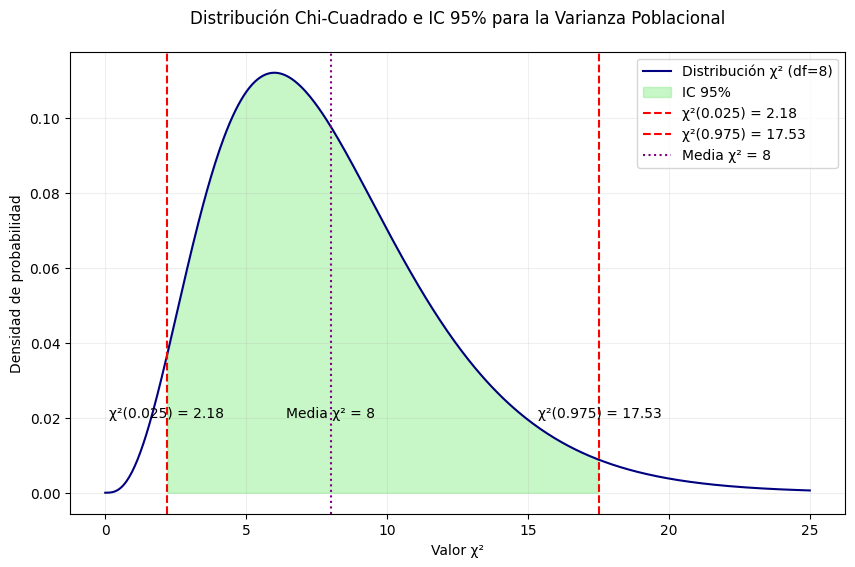

In [40]:
# Gráfico de densidad χ² mejorado
x_chi = np.linspace(0, 25, 500)
y_chi = chi2.pdf(x_chi, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x_chi, y_chi, label=f'Distribución χ² (df={grados_libertad})', color='navy')
plt.fill_between(x_chi, y_chi,
                 where=(x_chi >= chi2_inferior) & (x_chi <= chi2_superior),
                 color='lightgreen', alpha=0.5, label='IC 95%')

# Líneas críticas y anotaciones
plt.axvline(chi2_inferior, color='red', linestyle='--', label=f'χ²(0.025) = {chi2_inferior:.2f}')
plt.axvline(chi2_superior, color='red', linestyle='--', label=f'χ²(0.975) = {chi2_superior:.2f}')
plt.axvline(grados_libertad, color='purple', linestyle=':', label=f'Media χ² = {grados_libertad}')
plt.text(chi2_inferior, 0.02, f'χ²(0.025) = {chi2_inferior:.2f}', ha='center')
plt.text(chi2_superior, 0.02, f'χ²(0.975) = {chi2_superior:.2f}', ha='center')
plt.text(grados_libertad, 0.02, f'Media χ² = {grados_libertad}', ha='center')

plt.title('Distribución Chi-Cuadrado e IC 95% para la Varianza Poblacional', pad=20)
plt.xlabel('Valor χ²')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

### **Pregunta 5**

In [33]:
# 1. Cálculo de p_hat a partir de los datos originales
plantas_infectadas = [3, 4, 2, 6, 4, 8, 1, 3, 5]   # Datos por parcela
total_plantas = 20 * len(plantas_infectadas)       # 20 plantas/parcela × 9 parcelas
total_infectadas = sum(plantas_infectadas)         # Suma de infectadas
p_hat = total_infectadas / total_plantas           # Proporción muestral


# 2. Intervalo de confianza del 95%
z = norm.ppf(0.975)  # = 1.96

# Error estándar y margen de error
error_estandar = math.sqrt(p_hat * (1 - p_hat) / total_plantas)
margen_error = z * error_estandar

# Límites del intervalo
ic_inf = p_hat - margen_error
ic_sup = p_hat + margen_error

# --------------------------------------------
# 3. Resultados
# --------------------------------------------
print(f"Total plantas observadas: {total_plantas}")
print(f"Total plantas infectadas: {total_infectadas}")
print(f"Proporción muestral (p̂): {p_hat:.2f}")
print(f"\nValor crítico z (95% confianza): {z:.2f}")
print(f"Error estándar: {error_estandar:.2f}")
print(f"Margen de error: ±{margen_error:.2f}")
print(f"\nIntervalo de confianza al 95%:")
print(f"[ {ic_inf:.4f} , {ic_sup:.2f} ]")
print(f"En porcentaje: [ {ic_inf*100:.1f}% , {ic_sup*100:.1f}% ]")


Total plantas observadas: 180
Total plantas infectadas: 36
Proporción muestral (p̂): 0.20

Valor crítico z (95% confianza): 1.96
Error estándar: 0.03
Margen de error: ±0.06

Intervalo de confianza al 95%:
[ 0.1416 , 0.26 ]
En porcentaje: [ 14.2% , 25.8% ]


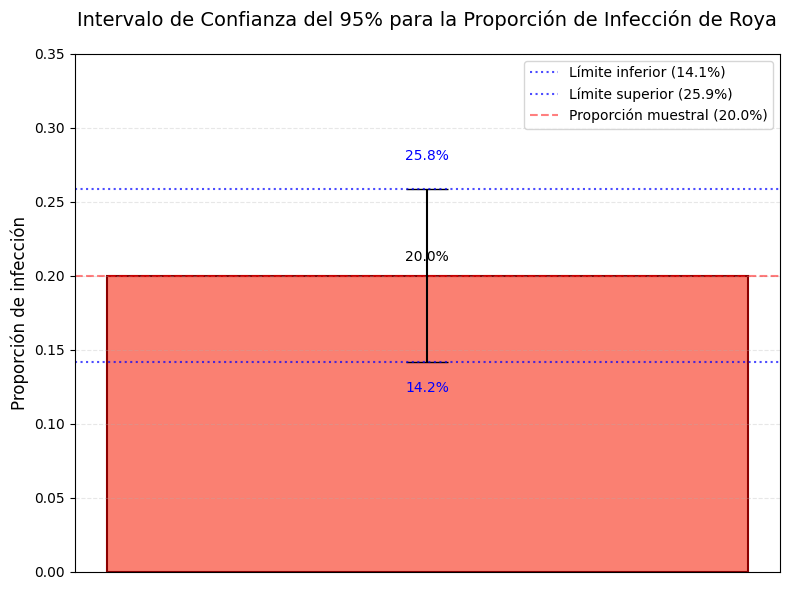

In [34]:
# Datos calculados previamente (ajustados al 95% de confianza)
prop_muestral = p_hat  # 0.20 (20%)
prop_error_inf = p_hat - ic_inf  # Margen inferior: 0.20 - 0.1415 = 0.0585
prop_error_sup = ic_sup - p_hat  # Margen superior: 0.2585 - 0.20 = 0.0585


# Gráfico mejorado
plt.figure(figsize=(8, 6))  # Tamaño ajustado

# Barra con intervalo de confianza
bar = plt.bar(['Proporción'], [prop_muestral],
              yerr=[[prop_error_inf], [prop_error_sup]],
              capsize=15, color='salmon', edgecolor='darkred', linewidth=1.5)

# Líneas de referencia y anotaciones
plt.axhline(y=ic_inf, color='blue', linestyle=':', alpha=0.7, label='Límite inferior (14.1%)')
plt.axhline(y=ic_sup, color='blue', linestyle=':', alpha=0.7, label='Límite superior (25.9%)')
plt.axhline(y=prop_muestral, color='red', linestyle='--', alpha=0.5, label=f'Proporción muestral (20.0%)')

# Anotaciones explícitas
plt.text(0, ic_inf - 0.02, f'{ic_inf*100:.1f}%', ha='center', color='blue')
plt.text(0, ic_sup + 0.02, f'{ic_sup*100:.1f}%', ha='center', color='blue')
plt.text(0, prop_muestral + 0.01, f'{prop_muestral*100:.1f}%', ha='center', color='black')

# Configuración estética
plt.ylim(0, 0.35)
plt.ylabel('Proporción de infección', fontsize=12)
plt.title('Intervalo de Confianza del 95% para la Proporción de Infección de Roya', pad=20, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

# Eliminar ejes x innecesarios
plt.xticks([])

plt.tight_layout()
plt.show()